### ARIMA

In [2]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from pandas import datetime
from random import random
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AR
import warnings
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

In [3]:
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)
gbc = data.groupby(by = data['cell_num'])
cell_1 = gbc.get_group('486-1258')
cell_2 = gbc.get_group('498-1268')
cell_3 = gbc.get_group('488-1264')

In [4]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)
 
    
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

0
26
11782
MSE  1.6846933240276125


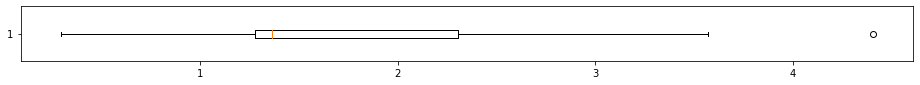

1
26
11782
MSE  1.2062311421083232


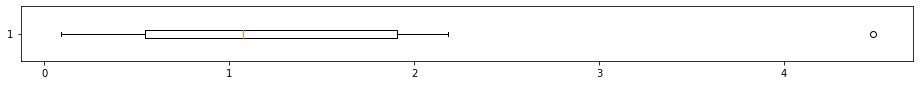

2
26
11782
MSE  1.3522961366685826


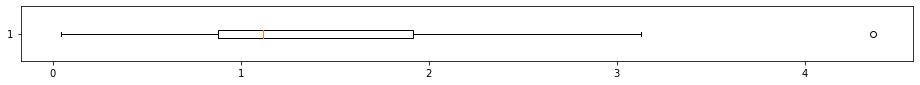

3
26
11782
MSE  1.284129145596033


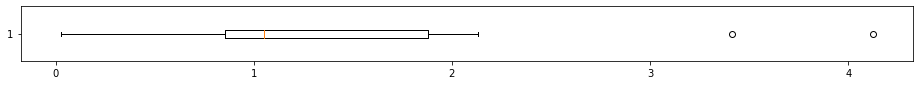

4
26
11782
MSE  1.3325718636304982


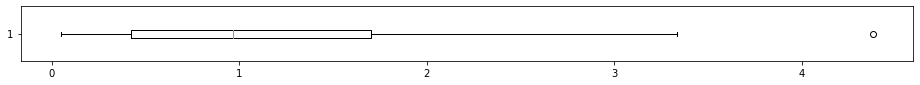

5
26
11782
MSE  0.9654115436138332


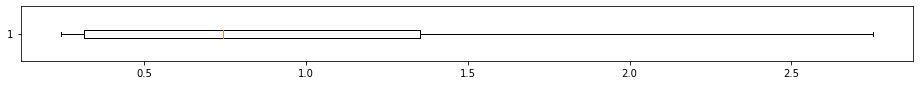

6
26
11782
MSE  2.114733996283693


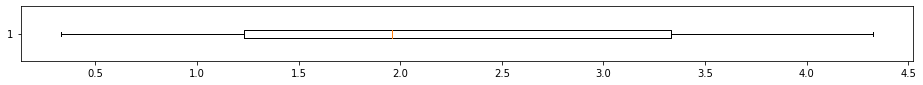

7
26
11782
MSE  2.0708551537214497


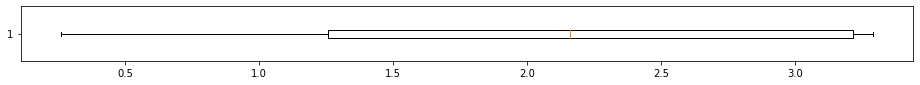

8
26
11782
MSE  2.050110555213688


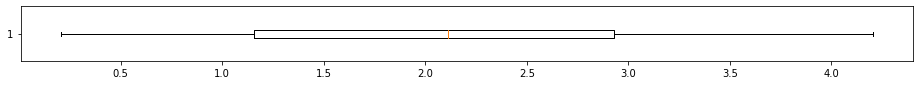

9
26
11782
MSE  1.5409302357057042


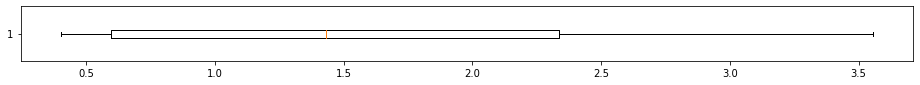

10
26
11782
MSE  1.5437799936189243


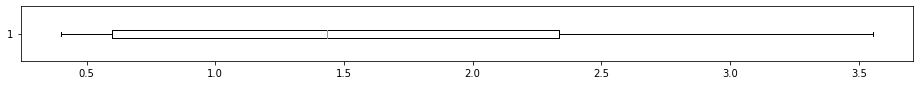

11
26
11782
MSE  20.683084449011655


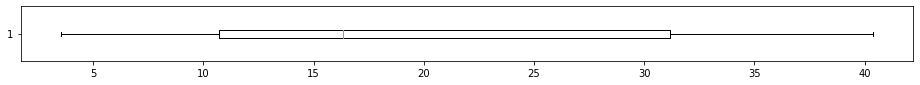

12
26
11782
MSE  19.244312078792106


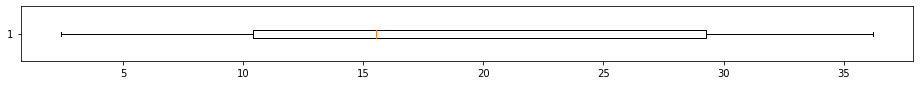

13
26
11782
MSE  10.174291766552725


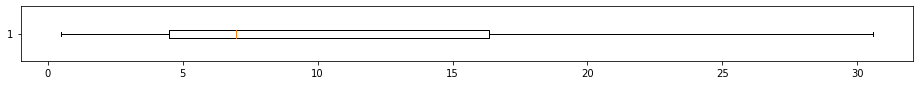

14
26
11782
MSE  2.4690057495704156


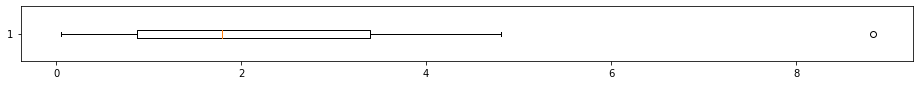

15
26
11782
MSE  0.6860267496884576


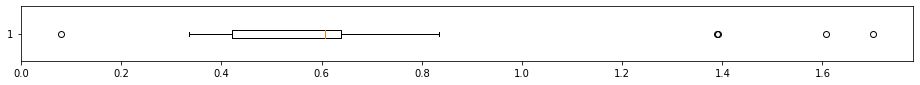

16
26
11782
MSE  0.9844151419181661


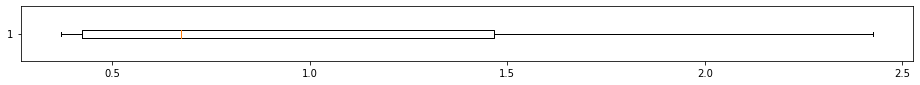

17
26
11782
MSE  1.6162492146007554


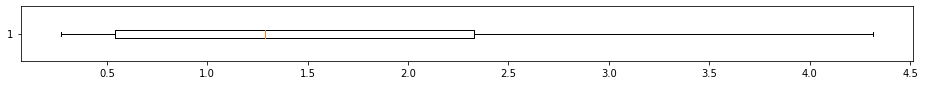

18
26
11782
MSE  1.6439233452479358


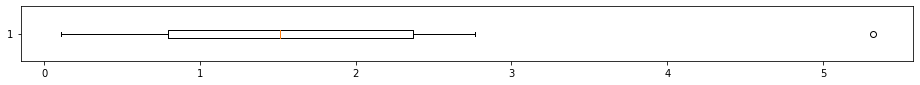

19
26
11782
MSE  1.3672820835591477


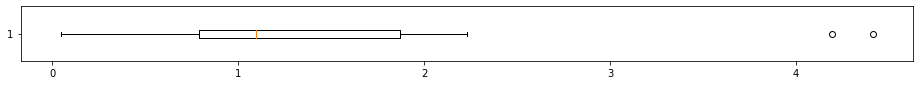

20
26
11782
MSE  1.3231636282396175


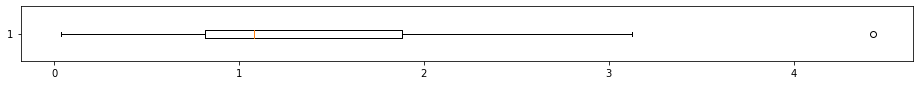

21
26
11782
MSE  1.4914858906563744


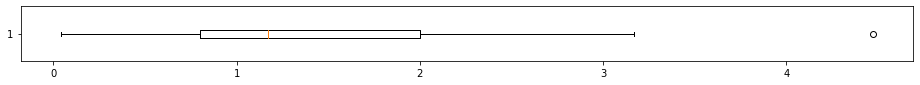

22
26
11782
MSE  1.4252304208541953


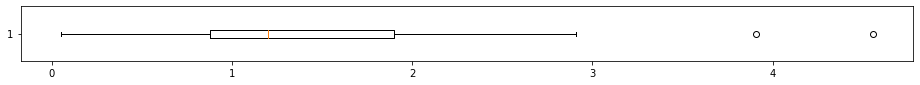

23
26
11782
MSE  4.06840262249951


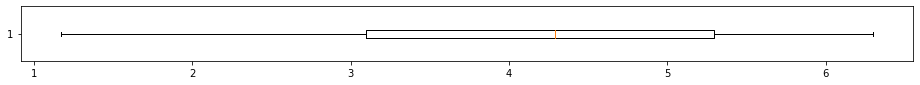

24
26
11782
MSE  3.638983921511427


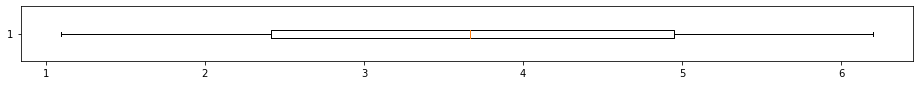

25
26
11782
MSE  1.8084866047016743


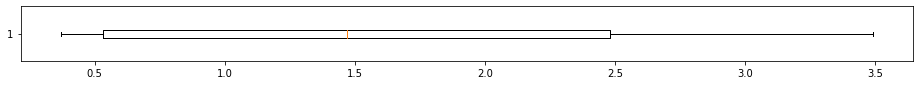

26
26
11782
MSE  2.1117566957069647


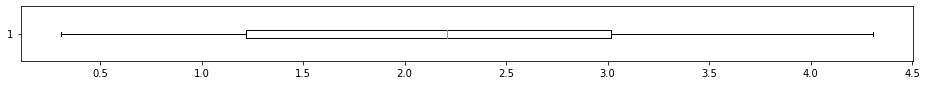

27
26
11782
MSE  3.3134105041807733


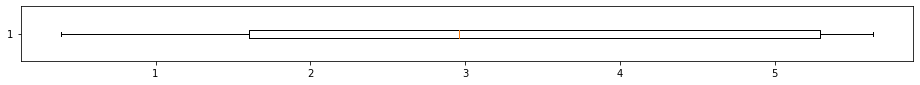

28
26
11782
MSE  24.065213102964908


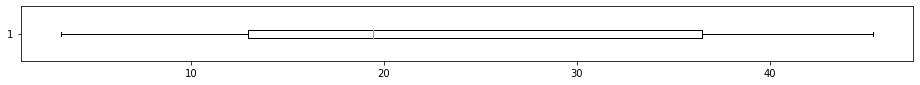

29
26
11782
MSE  21.437144128591477


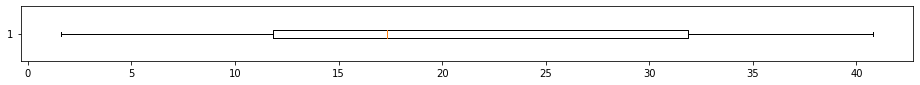

30
26
11782
MSE  11.513211203513173


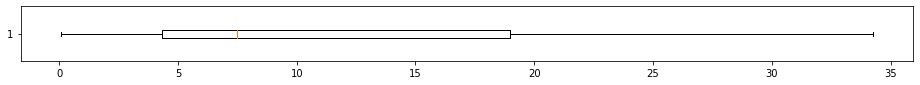

31
26
11782
MSE  4.06606453133636


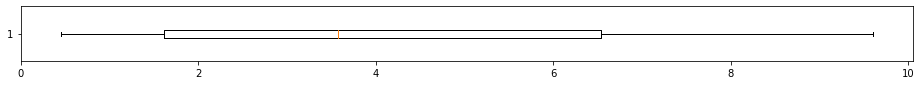

32
26
11782
MSE  1.0232810042047362


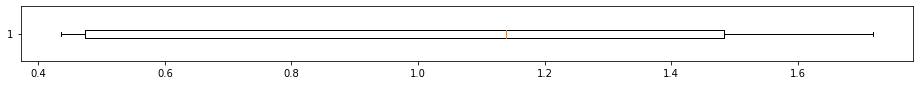

33
26
11782
MSE  2.857712745617788


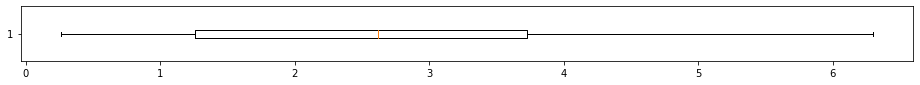

34
26
11782
MSE  6.905458808689638


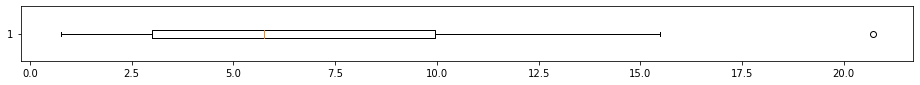

35
26
11782
MSE  6.983761780860356


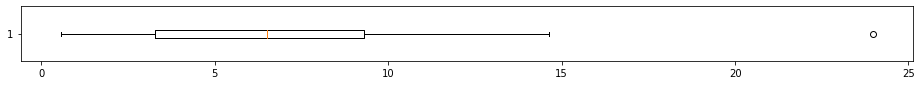

36
26
11782
MSE  2.8238957897725703


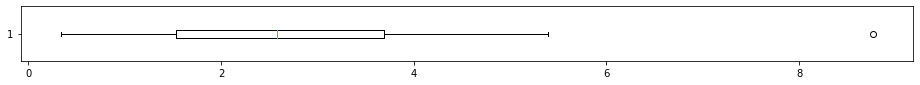

37
26
11782
MSE  1.4591060794746382


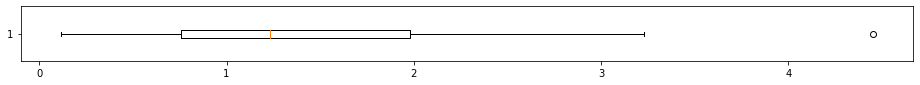

38
26
11782
MSE  1.5039913199239412


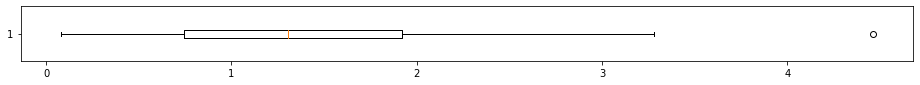

39
26
11782
MSE  1.6228901053836313


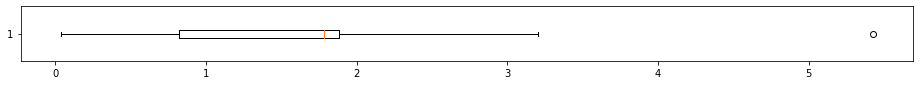

40
26
11782
MSE  6.044866109874805


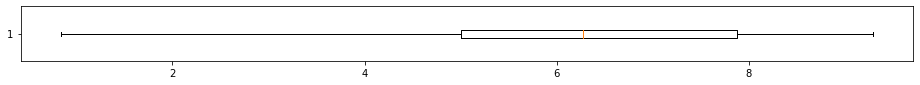

41
26
11782
MSE  7.037551633415129


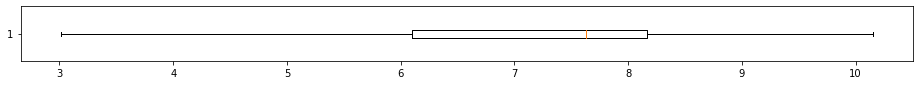

42
26
11782
MSE  7.045555514093185


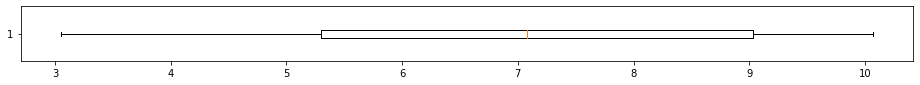

43
26
11782
MSE  4.629975205588924


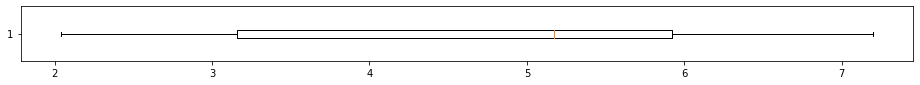

44
26
11782
MSE  2.365781427881473


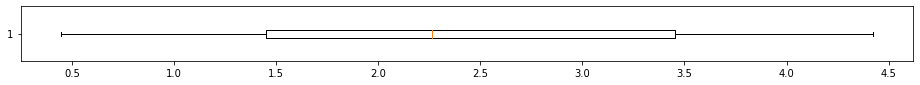

45
26
11782
MSE  15.260566260701411


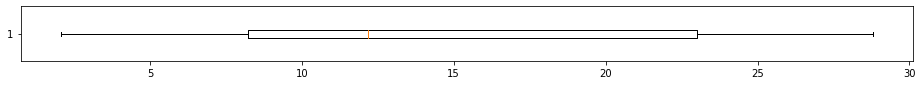

46
26
11782
MSE  24.94646525334119


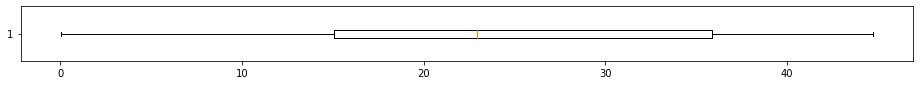

47
26
11782
MSE  20.290418622922427


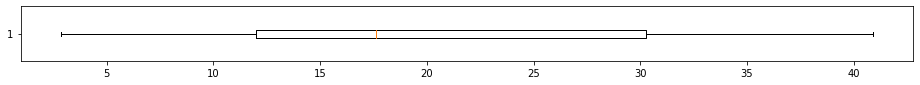

48
26
11782
MSE  5.866382221028148


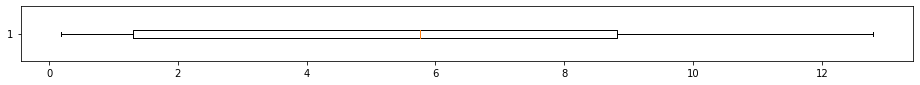

49
26
11782
MSE  1.9631739441374019


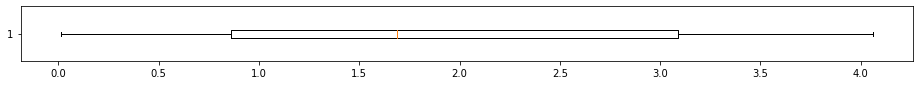

50
26
11782
MSE  3.4146772926433657


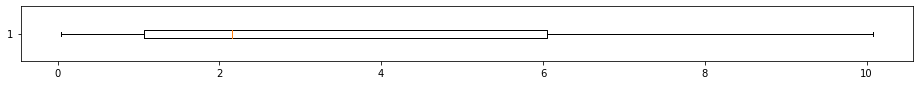

51
26
11782
MSE  13.368522335651473


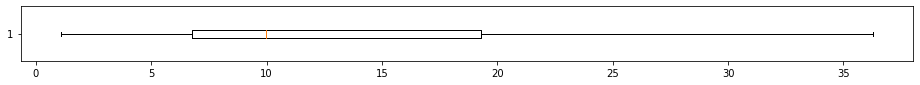

52
26
11782
MSE  11.658339842717783


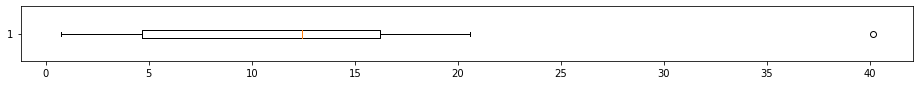

53
26
11782
MSE  6.834787444626699


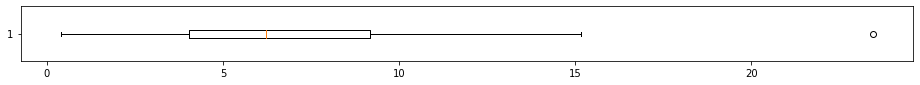

54
26
11782
MSE  5.760313528151654


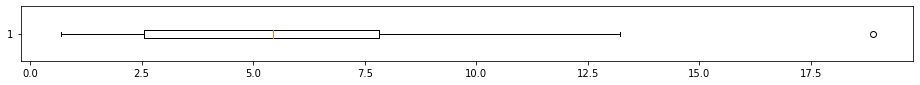

55
26
11782
MSE  2.1795087527362957


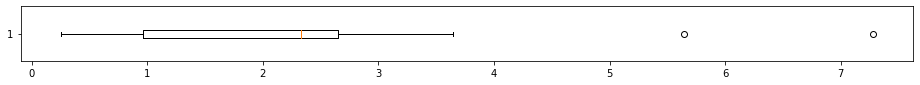

56
26
11782
MSE  1.391629536390134


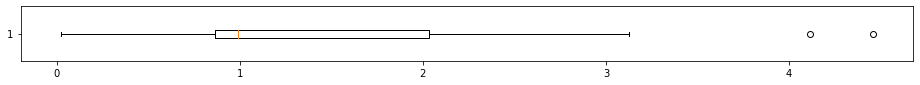

57
26
11782
MSE  4.282865480013532


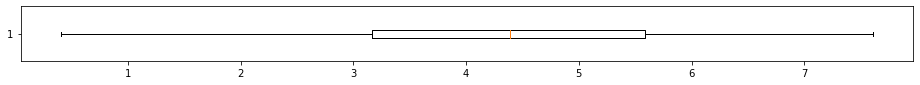

58
26
11782
MSE  6.489037167425073


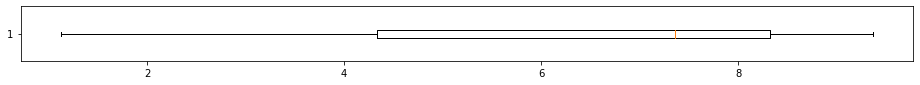

59
26
11782
MSE  7.084224729959056


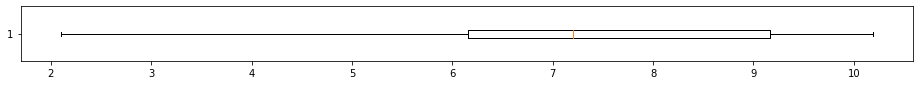

60
26
11782
MSE  7.125934610557933


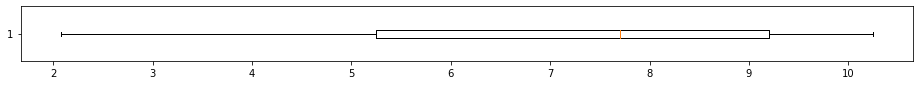

61
26
11782
MSE  6.908721338396418


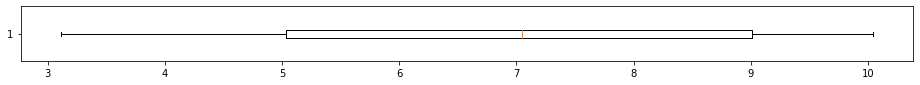

62
26
11782
MSE  2.2465513496166016


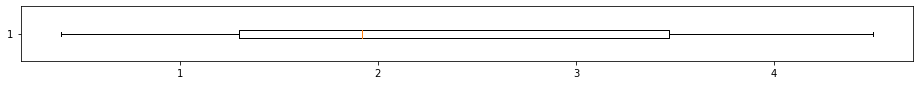

63
26
11782
MSE  3.963480054994339


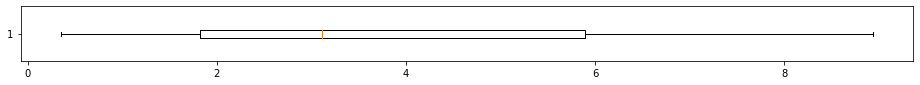

64
26
11782
MSE  4.490914128541599


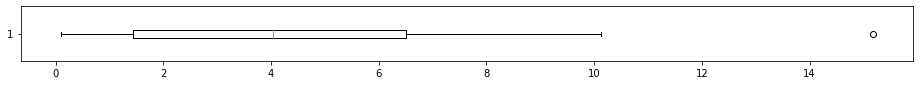

65
26
11782
MSE  6.31574474280588


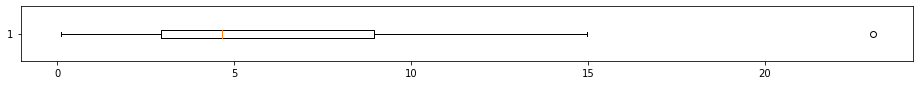

66
26
11782
MSE  2.667782588959026


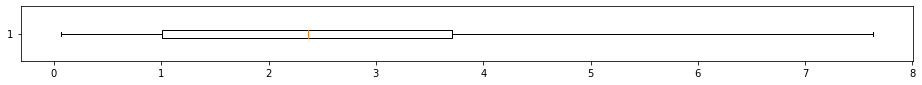

67
26
11782
MSE  2.985538423901812


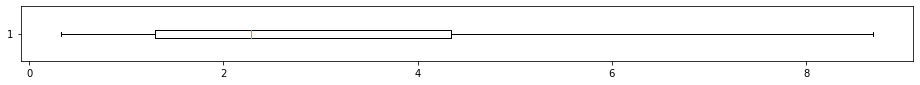

68
26
11782
MSE  9.044953938376057


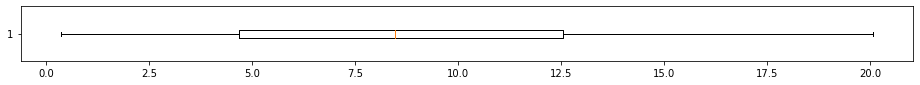

69
26
11782
MSE  2.5957775321883476


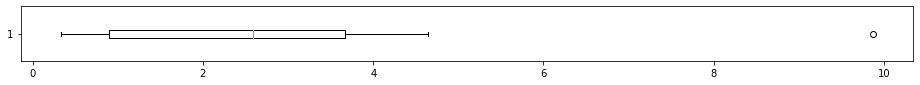

70
26
11782


KeyboardInterrupt: 

In [6]:
steps_forcast = 26
predicted = []
count = 0
dict2data = {}
dict2MAPE = {}
for i, k in gbc:
    predicted = []
    cell = i
    print(count)
    count +=1
    #if count > 15: break
    series_i = k['nr_people'].values
    
    X, y = series_i[0: 11782], series_i[11782:]
    print(len(y))
    print(len(X))
    days_in_year = 96
    differenced = difference(X, days_in_year)

    # fit model
    model = ARIMA(differenced, order=(15,2,1))
    model_fit = model.fit(disp=0)

    # multi-step out-of-sample forecast
    forecast = model_fit.forecast(steps=steps_forcast)[0]

    # invert the differenced forecast to something usable
    history = [x for x in X]
    day = 1
    for yhat in forecast:
        inverted = inverse_difference(history, yhat, days_in_year)
        #print('Day %d: %f' % (day, inverted))
        history.append(inverted)
        day += 1
        
        predicted.append(inverted)
        
    predicted = np.array(predicted)    
    error = abs(predicted - y)
    print('MSE ', np.mean(error))
    plt.figure(figsize=(16, 1))
    plt.boxplot(error, vert = False);
    plt.show()  
    
    MAPE = np.mean(abs(100 * (error/y)))
    dict2MAPE[cell] = MAPE
    
    # collect data 2 dictionary
    minimum = np.amin(error)   
    per75 = np.percentile(error, 75)
    per50 = np.percentile(error, 50)
    per25 = np.percentile(error, 25)
    maximum = np.amax(error)
    l5i = [minimum, per25, per50, per75, maximum]
    #l5i = ','.join(l5i)
    dict2data[cell] = l5i

In [ ]:
with open('MAE_error_data_4_ARIMA_MultistepForcast_26.csv', 'w') as f:
    for key, value in dict2data.items():
        f.write('%s:%s\n' % (key, value))
        
        
with open('MAPE_error_data_4_ARIMA_MultistepForecast_26.csv', 'w') as f:
    for key, value in dict2MAPE.items():
        f.write('%s:%s\n' % (key, value))         